In [119]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pedigree as pd 

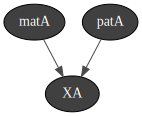

In [44]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matA","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patA","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.addArc("patA","XA")
bn.addArc("matA","XA")
f = 0.05
gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)

# Pedigree's loading

In [45]:
ped = pd.Pedigree()
ped.load('../data/fam9.ped')
for people in ped.get_pedigree().values():
    print(people)

[9 1 0 0 0 {'8', '4', '6', '10'}]
[9 2 0 0 0 {'8', '4', '6', '10'}]
[9 3 0 0 0 {'13', '12', '11'}]
[9 4 2 1 0 {'13', '12', '11'}]
[9 5 0 0 0 {'16', '14', '15'}]
[9 6 2 1 0 {'16', '14', '15'}]
[9 7 0 0 0 {'19', '17', '18'}]
[9 8 2 1 0 {'19', '17', '18'}]
[9 9 0 0 0 {'20', '22', '21'}]
[9 10 2 1 0 {'20', '22', '21'}]
[9 11 3 4 0 set()]
[9 12 3 4 0 set()]
[9 13 3 4 0 set()]
[9 14 6 5 0 set()]
[9 15 6 5 0 set()]
[9 16 6 5 0 set()]
[9 17 8 7 0 set()]
[9 18 8 7 0 set()]
[9 19 8 7 0 set()]
[9 20 9 10 0 set()]
[9 21 9 10 0 set()]
[9 22 9 10 0 set()]


In [192]:
def bn(ped,f):
    bn=gum.BayesNet()
    for p in ped.get_pedigree().values():
        if p.fatID == '0' and p.matID == '0': # Cas parents inconnu
            bn.add(gum.LabelizedVariable(f"mat{p.pID}",f"mother of {p.pID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"pat{p.pID}",f"father of {p.pID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
            bn.addArc(f"pat{p.pID}",f"X{p.pID}")
            bn.addArc(f"mat{p.pID}",f"X{p.pID}")
            bn.cpt(f"X{p.pID}").fillWith([(1-f)**2,f*(1-f),f*(1-f),f**2]*4)
        else:
# #             bn.add(gum.LabelizedVariable(f"mat{p.matID}",f"mother of {p.pID}",["0","1"]))
# #             bn.add(gum.LabelizedVariable(f"pat{p.fatID}",f"father of {p.pID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"Sk{p.matID}",f"Selector of {p.matID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"Sk{p.fatID}",f"Selector of {p.fatID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
            bn.addArc(f"X{p.matID}",f"X{p.pID}")
            bn.addArc(f"X{p.fatID}",f"X{p.pID}")
            
#        elif p.fatID != '0' and p.matID != '0':
#             bn.add(gum.LabelizedVariable(f"Sk{p.matID}",f"Selector of {p.matID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"Sk{p.fatID}",f"Selector of {p.fatID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
#             bn.addArc(f"pat{p.fatID}",f"X{p.pID}")
#             bn.addArc(f"mat{p.matID}",f"X{p.pID}")
    #gnb.showPotential('X1')
    gnb.showBN(bn,size=100)

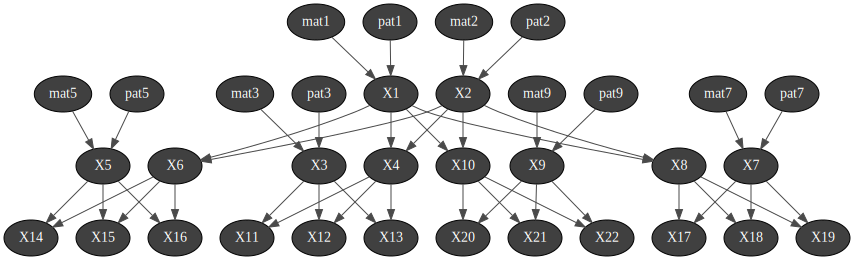

In [193]:
bn(ped,0.05)

{0, 1, 2, 3}


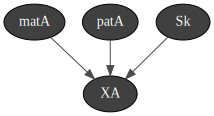

In [166]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matA","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patA","father of A",["0","1"]))
bn.add(gum.LabelizedVariable(f"Sk",f"Selector of matID",["0","1"]))
bn.add(gum.LabelizedVariable("XA","A",["0","1"]))
bn.cpt("Sk").fillWith([0.5,0.5])
print(bn.nodes())
bn.addArc("patA","XA")
bn.addArc("matA","XA")
bn.addArc("Sk","XA")

f = 0.05
gnb.showPotential(bn.cpt("XA").fillWith([1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)